In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [ ]:
data = pd.read_csv('aviation-accidents.csv')

In [ ]:
""" converto la colonna date in formato datetime specificando il formato che vedo nel dataset e
    converto la colonna year in formato numerico
"""
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors= 'coerce')
data['year'] = data['date'].dt.year

In [ ]:
""" filtro i valori di fatalities negativi o fuori scala dopo averli convertiti in numeri
"""
data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')
data = data[data['fatalities'] >=0]

In [ ]:
data.dropna(inplace=True)

In [ ]:
for col in data.columns:
    """ La funzione verifica se la colonna è di tipo stringa e
        applica strip() e lower() a tutte le stringhe della colonna
    """
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip().str.lower()

In [ ]:
""" creo un ordinamento del data frame in maniera discendente
    e salvo il data frame in formato csv ordinato e pulito
"""
data.sort_values(by='year', ascending=False, inplace=True)
data.to_csv('aviation-accidents_cleaned.csv',index =False)

In [ ]:
""" imposto uno stile di plt affinchè i grafici delle Viz abbiano reciproca coerenza
"""
print(plt.style.available)
plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


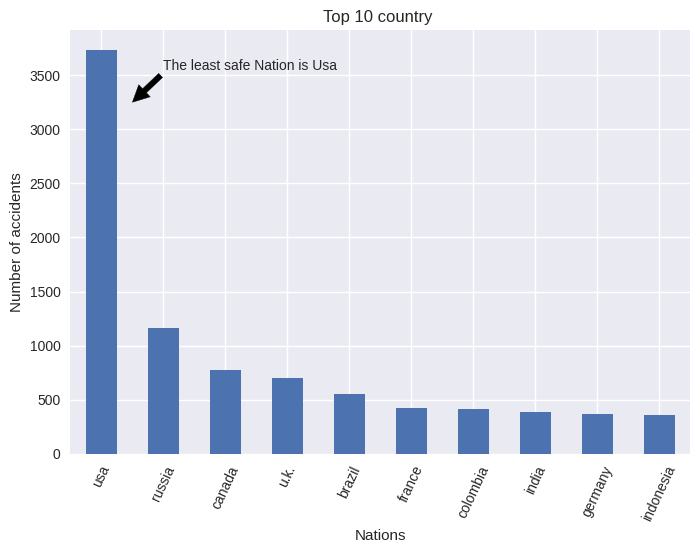

In [ ]:
""" In quale nazione si sono verificati più incidenti?
"""
accidents_by_country = data['country'].value_counts()
accidents_by_country.head(10).plot(kind='bar', title='Top 10 country ')
plt.xlabel('Nations')
plt.ylabel('Number of accidents')
plt.xticks(rotation=65)
plt.annotate('The least safe Nation is Usa', xy=(0.5, 3250), xytext=(1,3550),
             arrowprops=dict(facecolor='black'))

plt.show()

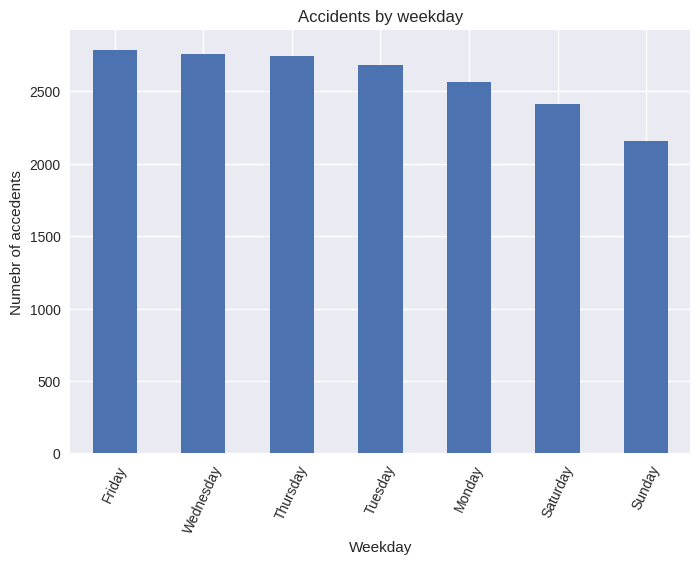

In [ ]:
""" Gli incidenti avvengono più di frequente durante determinati giorni della settimana?
"""
data['weekday'] = data ['date'].dt.day_name()
accidents_by_weekday = data['weekday'].value_counts()
accidents_by_weekday.plot(kind='bar', title= 'Accidents by weekday')
plt.xlabel('Weekday')
plt.ylabel('Numebr of accedents')
plt.xticks(rotation=65)
plt.show()

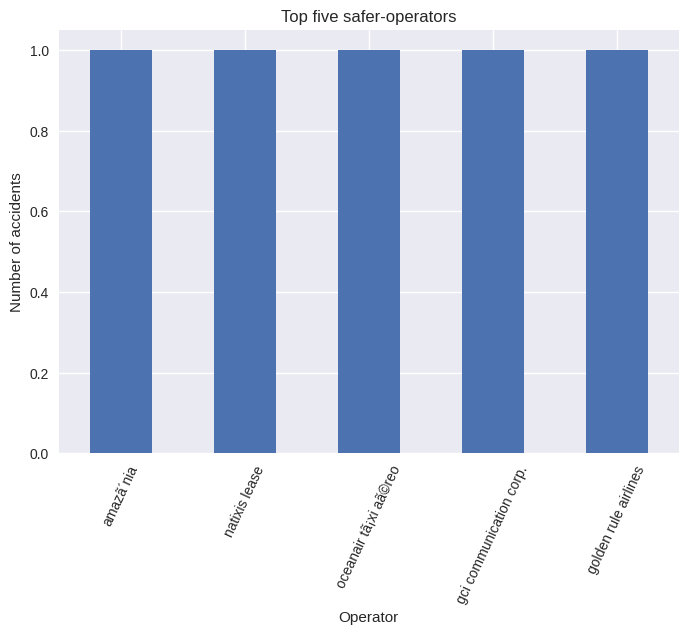

In [ ]:
""" Quali sono gli operatori più sicuri?
"""
accidents_by_operator = data['operator'].value_counts()
top_5_safer_operator = accidents_by_operator.sort_values(ascending=True).head(5)
top_5_safer_operator.plot(kind='bar', title='Top five safer-operators')
plt.xlabel('Operator')
plt.ylabel('Number of accidents')
plt.xticks(rotation=65)
plt.show()

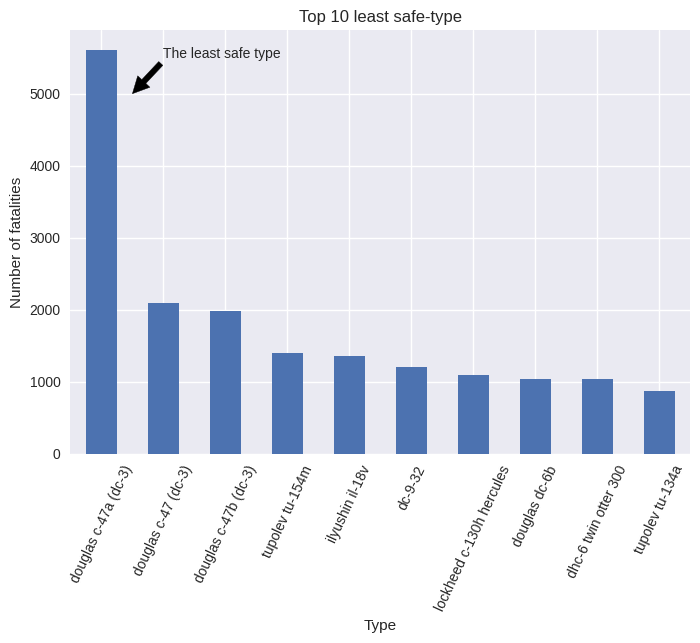

In [ ]:
""" Quale tipo di velivolo ha causato più morti?
"""
fatalities_by_type = data.groupby('type')['fatalities'].sum().sort_values(ascending=False)
fatalities_by_type.head(10).plot(kind='bar', title='Top 10 least safe-type')
plt.xlabel('Type')
plt.ylabel('Number of fatalities')
plt.xticks(rotation=65)
plt.annotate('The least safe type', xy=(0.5, 5000), xytext=(1,5500),
             arrowprops=dict(facecolor='black'))
plt.show()

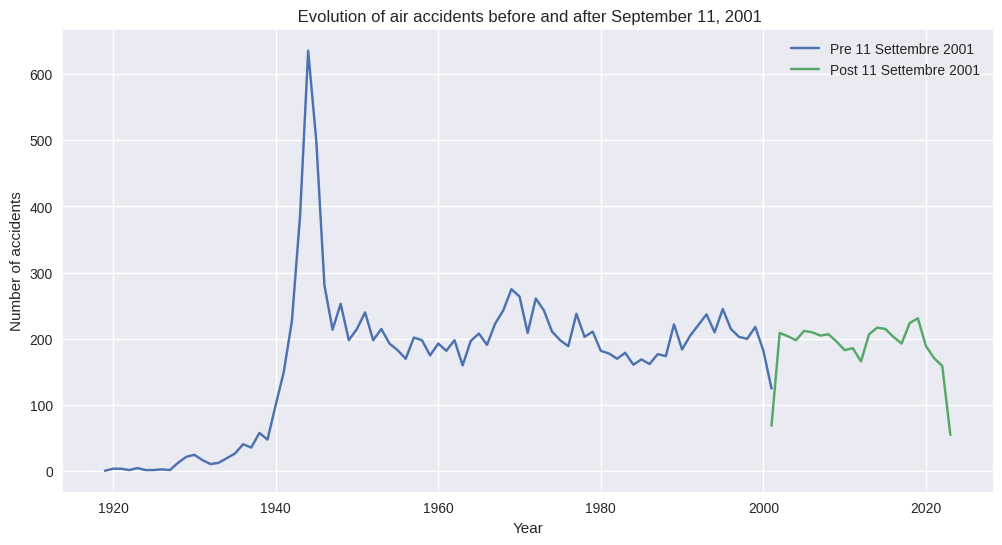

In [ ]:
""" Come si sono evoluti gli incidenti dopo l' 11 Setttembre ?
"""
pre_11_09 = data[data['date'] < '2001-09-11']
post_11_09 = data[data['date'] >= '2001-09-11']
accidents_pre_11_09 = pre_11_09['date'].dt.year.value_counts().sort_index()
accidents_post_11_09 = post_11_09['date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(accidents_pre_11_09, label='Pre 11 Settembre 2001')
plt.plot(accidents_post_11_09, label='Post 11 Settembre 2001')
plt.title(" Evolution of air accidents before and after September 11, 2001")
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.legend()
plt.show()

cat
h1    19.128205
c1     9.523132
a1     7.968701
c2     0.777778
h2     0.292683
a2     0.054177
o2     0.033898
o1     0.013111
i1     0.000000
i2     0.000000
u1     0.000000
Name: fatalities, dtype: float64


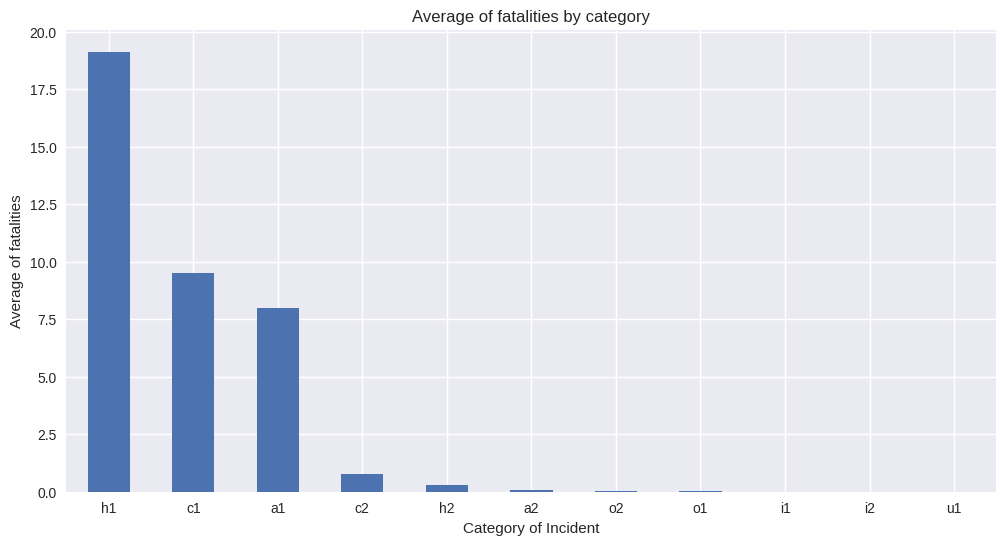

In [ ]:
""" Media delle vittime per categorie di incidente
"""
grouped_cat = data.groupby(['cat'])['fatalities'].mean().sort_values(ascending=False)
print(grouped_cat)
plt.figure(figsize=(12, 6))
grouped_cat.plot(kind='bar')
plt.title('Average of fatalities by category')
plt.xlabel('Category of Incident')
plt.ylabel('Average of fatalities')
plt.xticks(rotation=0)
plt.show()


year
2010.0    5.557377
2011.0    3.688172
2012.0    2.819277
2013.0    1.714976
2014.0    5.576037
2015.0    3.153488
2016.0    2.748768
2017.0    1.430052
2018.0    4.281250
2019.0    1.813853
2020.0    1.746032
2021.0    1.567251
2022.0    1.735849
2023.0    1.600000
Name: fatalities, dtype: float64


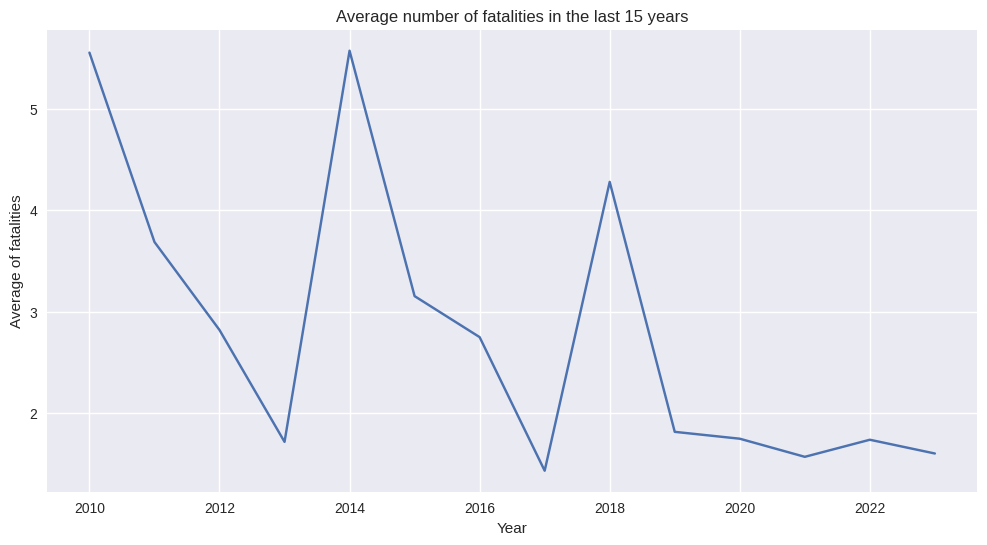

In [ ]:
""" Andamento della media delle vittime negli ultimi 15 anni
"""
grouped_year = data.groupby(['year'])['fatalities'].mean()
current_year = datetime.now().year
start_year = current_year - 15
grouped_last_20_years = grouped_year[grouped_year.index >= start_year]
print(grouped_last_20_years)
plt.figure(figsize=(12, 6))
grouped_last_20_years.plot(kind='line')
plt.title('Average number of fatalities in the last 15 years')
plt.xlabel('Year')
plt.ylabel('Average of fatalities')
plt.show()

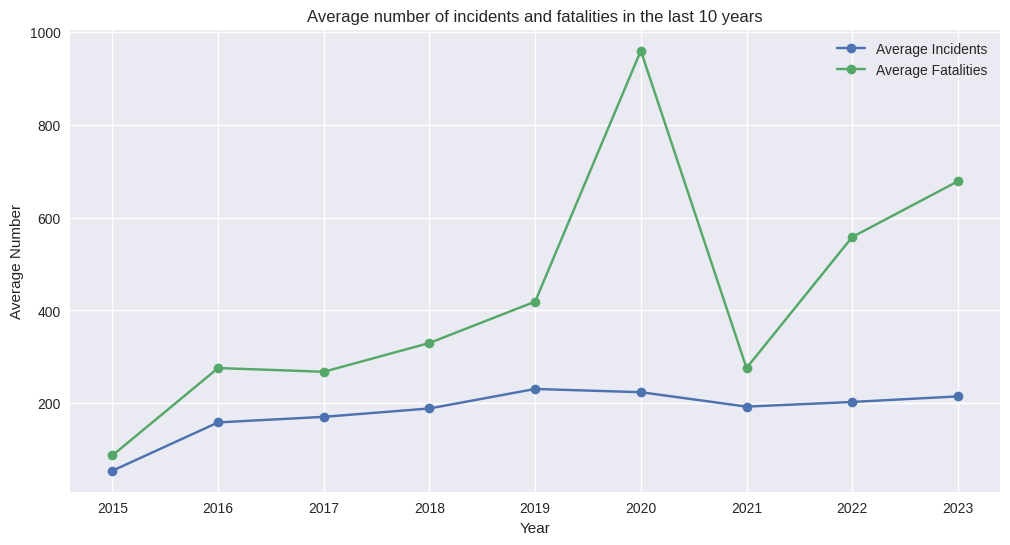

In [ ]:
""" Il grafico mette in relazione e a confronto le medie degli incidenti aerei e le medie delle vittime
    come riferimento temporale degli ultimi 10 anni
"""
current_year = datetime.now().year
start_year = current_year - 10
data_last_10_years = data[data['year'] >= start_year]

incidents_per_year = data_last_10_years.groupby('year').size()
fatalities_per_year = data_last_10_years.groupby('year')['fatalities'].sum()

average_incidents = incidents_per_year.mean()
average_fatalities = fatalities_per_year.mean()

years = data_last_10_years['year'].unique()
plt.figure(figsize=(12, 6))
plt.plot(years, incidents_per_year, marker='o', label='Average Incidents')
plt.plot(years, fatalities_per_year, marker='o', label='Average Fatalities')
plt.xlabel('Year')
plt.ylabel('Average Number')
plt.title('Average number of incidents and fatalities in the last 10 years')
plt.legend()
plt.show()


Every 1.13 accidents without victims there is an accident with at least one victim.


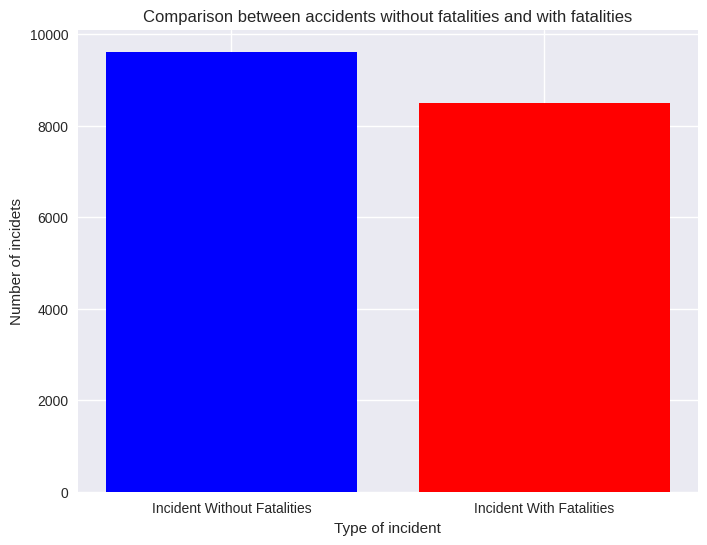

In [ ]:
""" Ogni quanti incidenti senza vittime c' è un incidente con almeno una vittima?
"""
incident_without_fatalities = data[data['fatalities'] == 0].shape[0]

incident_with_fatalities = data[data['fatalities'] > 0].shape[0]

if incident_with_fatalities > 0:
    relationship = incident_without_fatalities / incident_with_fatalities
    print(f"Every {relationship:.2f} accidents without victims there is an accident with at least one victim.")
else:
    print("Non ci sono incidenti con almeno una vittima nel dataset.")

category = ['Incident Without Fatalities', 'Incident With Fatalities']
value = [incident_without_fatalities, incident_with_fatalities]
plt.figure(figsize=(8, 6))
plt.bar(category, value, color=['blue','red'])
plt.xlabel('Type of incident')
plt.ylabel('Number of incidets')
plt.title('Comparison between accidents without fatalities and with fatalities')
plt.show()

In [ ]:
""" il cartogramma indica la distribusione del numero degli incidenti aerei nei diversi paesi presenti nel dataset
"""
incidents_by_country = data['country'].value_counts()
data_viz = incidents_by_country.reset_index()
data_viz.columns = ['Country' , 'Number of Incidents']

fig = px.choropleth(
        data_viz,
        locations='Country',
        locationmode='country names',
        color='Number of Incidents',
        hover_name='Country',
        title='Number of Airplane Incidents per Country',
        color_continuous_scale=px.colors.sequential.Plasma)

fig.show()